In [142]:
#For Data loading and preprocessing
import pandas as pd

#For matrix operations
import numpy as np

#For plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#For splitting the data
from sklearn.model_selection import train_test_split

#For data preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler

#For hyperparameter tuning
# from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
#For appling LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# For model/vatiable persistence 
# from sklearn.externals import joblib

#For math operations
import math 

#To see the progress of the iterations
#from tqdm import tqdm

#Performance metrices
# from sklearn.metrics import roc_auc_score,roc_curve,auc,log_loss,confusion_matrix

#For encoding the features
from sklearn.preprocessing import LabelEncoder#,LabelBinarizer

import time

#For ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [143]:
data = pd.read_csv('/home/vidhikatkoria/Downloads/weather-dataset/weatherAUS.csv')

print("Total no.of points = {}".format(data.shape[0]))
data.head(5)

Total no.of points = 142193


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [144]:
data.drop_duplicates(inplace=True)

In [145]:
data.isnull().any()

Date             False
Location         False
MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Cloud9am          True
Cloud3pm          True
Temp9am           True
Temp3pm           True
RainToday         True
RISK_MM          False
RainTomorrow     False
dtype: bool

In [146]:
data.isnull().sum() * 100 / len(data)  #calculate the percentage of missing data in each column 

Date              0.000000
Location          0.000000
MinTemp           0.447983
MaxTemp           0.226453
Rainfall          0.988797
Evaporation      42.789026
Sunshine         47.692924
WindGustDir       6.561504
WindGustSpeed     6.519308
WindDir9am        7.041838
WindDir3pm        2.656952
WindSpeed9am      0.948007
WindSpeed3pm      1.849599
Humidity9am       1.247600
Humidity3pm       2.538803
Pressure9am       9.855619
Pressure3pm       9.832411
Cloud9am         37.735332
Cloud3pm         40.152469
Temp9am           0.635756
Temp3pm           1.917113
RainToday         0.988797
RISK_MM           0.000000
RainTomorrow      0.000000
dtype: float64

In [147]:
''' DECISION:
drop Evaporation, Sunshine, Cloud9am, Cloud3pm out of the data'''
data = data.drop( ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis=1 )

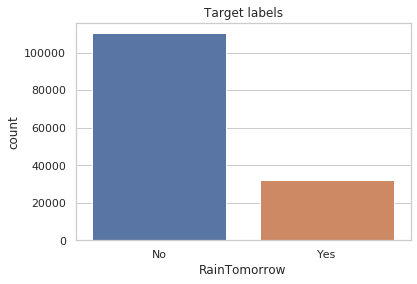

In [148]:
sns.set(style="whitegrid")
sns.countplot(data.RainTomorrow)
plt.title("Target labels")
plt.show()

In [149]:
#Separating the data based on its class label.
data_yes = data[data['RainTomorrow']=='Yes']
data_no = data[data['RainTomorrow']=='No']

In [150]:
#Observing the mode for all columns when RainTomorrow = Yes  
mode_values_for_yes = data_yes.mode()
mode_values_for_yes

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2010-09-03,Portland,9.6,17.2,0.0,W,39.0,N,W,9.0,17.0,99.0,69.0,1014.0,1010.4,13.8,16.0,No,1.2,Yes


In [151]:
#Observing the mode for all columns when RainTomorrow = No  
mode_values_for_no = data_no.mode()
mode_values_for_no

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2014-03-18,Canberra,11.0,20.0,0.0,E,35.0,N,SE,9.0,13.0,65.0,52.0,1017.9,1015.5,16.0,20.0,No,0.0,No


In [157]:
#For Temparatures we cannot replace NaN values with 0, hence replacing NaN with its respective mode value
data_yes['MinTemp'].fillna(value=data_yes['MinTemp'].mode()[0],inplace=True )
data_no['MinTemp'].fillna(value=data_no['MinTemp'].mode()[0],inplace=True )

data_yes['MaxTemp'].fillna(value=data_yes['MaxTemp'].mode()[0],inplace=True )
data_no['MaxTemp'].fillna(value=data_no['MaxTemp'].mode()[0],inplace=True )


data_yes['Temp9am'].fillna(value=data_yes['Temp9am'].mode()[0],inplace=True )
data_no['Temp9am'].fillna(value=data_no['Temp9am'].mode()[0],inplace=True )

data_yes['Temp3pm'].fillna(value=data_yes['Temp3pm'].mode()[0],inplace=True )
data_no['Temp3pm'].fillna(value=data_no['Temp3pm'].mode()[0],inplace=True )


# For humidity also 
data_yes['Humidity9am'].fillna(value=data_yes['Humidity9am'].mode()[0],inplace=True )
data_no['Humidity9am'].fillna(value=data_no['Humidity9am'].mode()[0],inplace=True )



data_yes['Humidity3pm'].fillna(value=data_yes['Humidity3pm'].mode()[0],inplace=True )
data_no['Humidity3pm'].fillna(value=data_no['Humidity3pm'].mode()[0],inplace=True )

# For the rain fall feature we can replace NaN with 0.0 which says there is no rain fall
data_yes['Rainfall'].fillna(value=1.0,inplace=True)
data_no['Rainfall'].fillna(value=0.0,inplace=True)


data_yes['Pressure9am'].fillna(value=data_yes['Pressure9am'].median(),inplace=True )
data_no['Pressure9am'].fillna(value=data_no['Pressure9am'].median(),inplace=True )

data_yes['Pressure3pm'].fillna(value=data_yes['Pressure3pm'].median(),inplace=True )
data_no['Pressure3pm'].fillna(value=data_no['Pressure3pm'].median(),inplace=True )


data_yes['WindSpeed9am'].fillna(value=data_yes['WindSpeed9am'].median(),inplace=True )
data_no['WindSpeed9am'].fillna(value=data_no['WindSpeed9am'].median(),inplace=True )

data_yes['WindSpeed3pm'].fillna(value=data_yes['WindSpeed3pm'].median(),inplace=True )
data_no['WindSpeed3pm'].fillna(value=data_no['WindSpeed3pm'].median(),inplace=True )

#WindGustSpeed -- replacing with median
data_yes['WindGustSpeed'].fillna(value=data_yes['WindGustSpeed'].median(),inplace=True)
data_no['WindGustSpeed'].fillna(value=data_no['WindGustSpeed'].median(),inplace=True)

In [158]:
# For RainToday feature we cannot fill any value, so better to remove the NaN values 
data_yes.dropna(inplace=True)
data_no.dropna(inplace=True)

In [159]:
data_filled= data_yes.append(data_no, ignore_index=True)

In [160]:
data_filled.isnull().any()

Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Temp9am          False
Temp3pm          False
RainToday        False
RISK_MM          False
RainTomorrow     False
dtype: bool

In [161]:
print("Percentage of removed points= {}%".format(100.00-(len(data_filled)*100/len(data))))

Percentage of removed points= 12.998530166745198%


In [162]:
# sorting the data based on data (Time based splitting)
data_filled=data_filled.sort_values(by='Date')
data_filled.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
8126,2007-11-01,Canberra,8.0,24.3,0.0,NW,30.0,SW,NW,6.0,20.0,68.0,29.0,1019.7,1015.0,14.4,23.6,No,3.6,Yes
8127,2007-11-02,Canberra,14.0,26.9,3.6,ENE,39.0,E,W,4.0,17.0,80.0,36.0,1012.4,1008.4,17.5,25.7,Yes,3.6,Yes
8128,2007-11-03,Canberra,13.7,23.4,3.6,NW,85.0,N,NNE,6.0,6.0,82.0,69.0,1009.5,1007.2,15.4,20.2,Yes,39.8,Yes
8129,2007-11-04,Canberra,13.3,15.5,39.8,NW,54.0,WNW,W,30.0,24.0,62.0,56.0,1005.5,1007.0,13.5,14.1,Yes,2.8,Yes
55441,2007-11-05,Canberra,7.6,16.1,2.8,SSE,50.0,SSE,ESE,20.0,28.0,68.0,49.0,1018.3,1018.5,11.1,15.4,Yes,0.0,No


In [163]:
#Removing unwanted features, RISK_MM is same as target label hence removing with data and loaction  
data_filled = data_filled.drop(['Date', 'Location','RISK_MM'], axis=1)
data_filled.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8126,8.0,24.3,0.0,NW,30.0,SW,NW,6.0,20.0,68.0,29.0,1019.7,1015.0,14.4,23.6,No,Yes
8127,14.0,26.9,3.6,ENE,39.0,E,W,4.0,17.0,80.0,36.0,1012.4,1008.4,17.5,25.7,Yes,Yes
8128,13.7,23.4,3.6,NW,85.0,N,NNE,6.0,6.0,82.0,69.0,1009.5,1007.2,15.4,20.2,Yes,Yes
8129,13.3,15.5,39.8,NW,54.0,WNW,W,30.0,24.0,62.0,56.0,1005.5,1007.0,13.5,14.1,Yes,Yes
55441,7.6,16.1,2.8,SSE,50.0,SSE,ESE,20.0,28.0,68.0,49.0,1018.3,1018.5,11.1,15.4,Yes,No


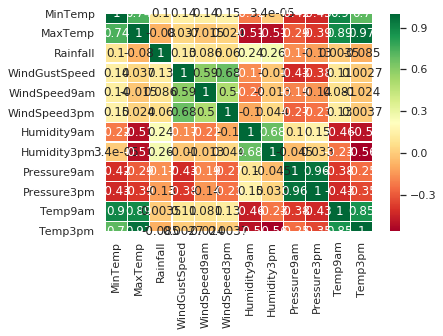

In [164]:
#It is time to look at a heatmap (using the library seaborn) to see the correlation among features
fig = sns.heatmap(data_filled.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #df_train.corr()-->correlation matrix


In [165]:
#We can see that 'MaxTemp' and 'Temp3pm' seem to be highly correlated.
#We want to make sure, so we will look at the numerical values
data_filled.corr()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.737999,0.099859,0.141225,0.138199,0.153681,-0.217670,0.000034,-0.415564,-0.430814,0.896733,0.703398
MaxTemp,0.737999,1.000000,-0.079886,0.037329,-0.015482,0.024221,-0.507641,-0.508283,-0.292425,-0.386860,0.888546,0.972335
Rainfall,0.099859,-0.079886,1.000000,0.131532,0.085619,0.060373,0.239377,0.260504,-0.168453,-0.127687,0.003489,-0.084967
WindGustSpeed,0.141225,0.037329,0.131532,1.000000,0.591774,0.675796,-0.173064,-0.010367,-0.427534,-0.383442,0.107555,0.002718
WindSpeed9am,0.138199,-0.015482,0.085619,0.591774,1.000000,0.504546,-0.217463,-0.012747,-0.194908,-0.144878,0.081112,-0.024260
WindSpeed3pm,0.153681,0.024221,0.060373,0.675796,0.504546,1.000000,-0.099911,0.043607,-0.272143,-0.232922,0.132976,0.003733
Humidity9am,-0.217670,-0.507641,0.239377,-0.173064,-0.217463,-0.099911,1.000000,0.680379,0.100945,0.151943,-0.462115,-0.501454
Humidity3pm,0.000034,-0.508283,0.260504,-0.010367,-0.012747,0.043607,0.680379,1.000000,-0.044896,0.032965,-0.228037,-0.562221
Pressure9am,-0.415564,-0.292425,-0.168453,-0.427534,-0.194908,-0.272143,0.100945,-0.044896,1.000000,0.959690,-0.381003,-0.247303
Pressure3pm,-0.430814,-0.386860,-0.127687,-0.383442,-0.144878,-0.232922,0.151943,0.032965,0.959690,1.000000,-0.432869,-0.347705


In [166]:
#We can remove either 'MaxTemp' or 'Temp3pm' because the correlation value is 0.969 (close to 1)
#The same goes for the pairs ( 'MinTemp', 'Temp9am' ), ('Pressure9am', 'Pressure3pm')
#DECISION: Remove 'Temp3pm', 'Temp9am' and 'Pressure9am'
data_filled = data_filled.drop( ['Temp3pm', 'Temp9am', 'Pressure9am'] , axis=1 )


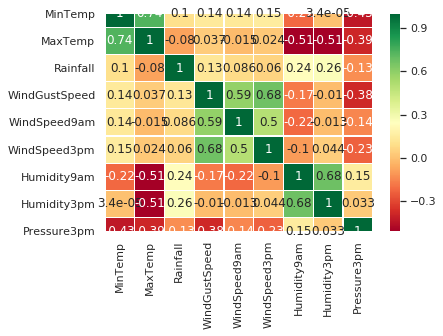

In [167]:
#see the correlation among features in df_train again
fig = sns.heatmap(data_filled.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #df_train.corr()-->correlation matrix

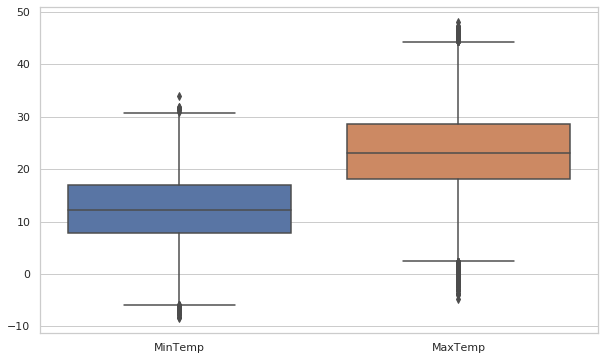

In [168]:
#Outliers we are checking only for numerical features
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_filled[['MinTemp','MaxTemp']])

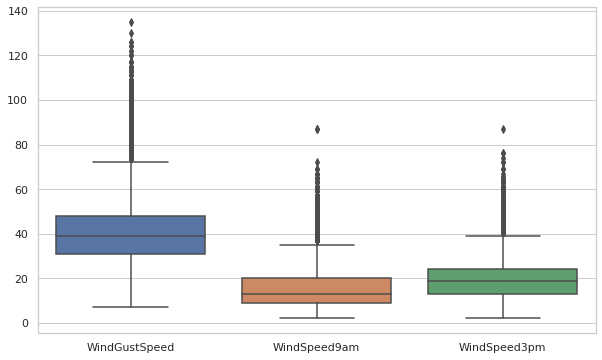

In [169]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_filled[['WindGustSpeed','WindSpeed9am','WindSpeed3pm']])

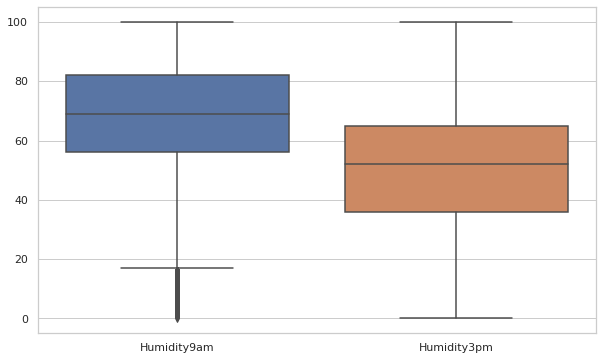

In [170]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_filled[['Humidity9am','Humidity3pm']])

In [171]:
data_filled= data_filled[data_filled['Humidity3pm']!=0.0]
data_filled= data_filled[data_filled['Humidity9am']!=0.0]

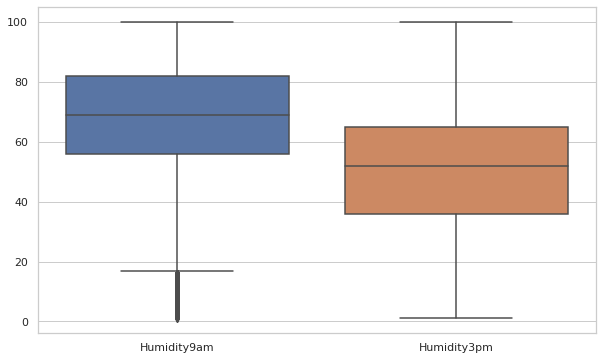

In [172]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_filled[['Humidity9am','Humidity3pm']])

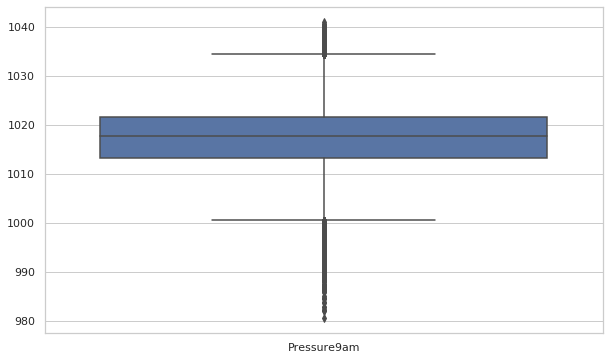

In [173]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_final[['Pressure9am']])

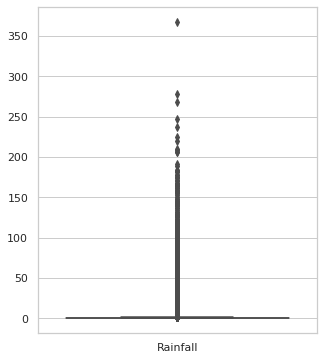

In [174]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 6))
sns.boxplot(data=data_final[['Rainfall']])

In [175]:
WindGustDir_encode = LabelEncoder()
data_filled['WindGustDir']=WindGustDir_encode.fit_transform(data_filled['WindGustDir'])

WindDir9am_encode = LabelEncoder()
data_filled['WindDir9am']=WindDir9am_encode.fit_transform(data_filled['WindDir9am'])

WindDir3pm_encode = LabelEncoder()
data_filled['WindDir3pm']=WindDir3pm_encode.fit_transform(data_filled['WindDir3pm'])

RainToday_encode = LabelEncoder()
data_filled['RainToday']=RainToday_encode.fit_transform(data_filled['RainToday'])

RainTomorrow_encode = LabelEncoder()
data_filled['RainTomorrow']=RainTomorrow_encode.fit_transform(data_filled["RainTomorrow"])

data_filled.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,RainToday,RainTomorrow
8126,8.0,24.3,0.0,7,30.0,12,7,6.0,20.0,68.0,29.0,1015.0,0,1
8127,14.0,26.9,3.6,1,39.0,0,13,4.0,17.0,80.0,36.0,1008.4,1,1
8128,13.7,23.4,3.6,7,85.0,3,5,6.0,6.0,82.0,69.0,1007.2,1,1
8129,13.3,15.5,39.8,7,54.0,14,13,30.0,24.0,62.0,56.0,1007.0,1,1
55441,7.6,16.1,2.8,10,50.0,10,2,20.0,28.0,68.0,49.0,1018.5,1,0


In [176]:
df_train, df_test = train_test_split( data_filled, test_size = 0.2, random_state=42 )
df_train = df_train.copy()
df_test = df_test.copy()

In [177]:
X_train = df_train.drop('RainTomorrow', axis = 1)
X_test = df_test.drop('RainTomorrow', axis = 1)
y_train = df_train['RainTomorrow']
y_test = df_test['RainTomorrow']
X_train.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,RainToday
66526,9.5,26.4,0.0,0,33.0,1,0,7.0,26.0,90.0,47.0,1009.5,0
39002,7.4,19.4,0.0,5,57.0,7,4,9.0,28.0,57.0,57.0,1017.6,0
5854,16.0,22.2,4.6,8,48.0,8,8,30.0,20.0,98.0,97.0,1014.8,1
85033,19.7,29.4,1.4,9,46.0,8,0,17.0,20.0,72.0,38.0,1015.3,1
50813,3.9,13.0,0.0,14,22.0,14,14,6.0,13.0,97.0,73.0,1025.1,0


In [178]:
''' NORMALIZATION '''
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform( X_train ) 
X_train.loc[:,:] = scaled_values
scaled_values = scaler.transform( X_test ) #DO NOT USE fit METHOD BECAUSE IT'S BEEN MODIFIED ACCORDING TO X_train
X_test.loc[:,:] = scaled_values

In [185]:
t0=time.time()
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
import  pickle
filename = 'LogisticsRegressionModel.sav'
pickle.dump(logreg,open(filename,'wb'))
from sklearn.metrics import accuracy_score
acc_log = accuracy_score(y_test,y_pred) *100
print(acc_log)
t_log = time.time()-t0
print(t_log)

84.633416862016
0.4998800754547119


In [186]:
t0=time.time()
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
filename = 'GaussianNaiveBayesModel.sav'
pickle.dump(gaussian,open(filename,'wb'))
acc_gaussian = accuracy_score(y_test,y_pred) *100
print(acc_gaussian)
t_gaussian = time.time()-t0
print(t_gaussian)

81.42834047368846
0.048990488052368164


In [187]:
t0=time.time()
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
filename = 'DecisionTreeModel.sav'
pickle.dump(decision_tree,open(filename,'wb'))
acc_decision_tree = accuracy_score(y_test,y_pred) *100
print(acc_decision_tree)
t_decision_tree = time.time()-t0
print(t_decision_tree)

79.70253011074287
0.7963151931762695


In [188]:
t0=time.time()
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
filename = 'RandomForestModel.sav'
pickle.dump(random_forest,open(filename,'wb'))
acc_random_forest = accuracy_score(y_test,y_pred) *100
print(acc_random_forest)
t_random_forest = time.time()-t0
print(t_random_forest)

86.39156090857651
15.077991485595703


In [189]:
models = pd.DataFrame(
    {
    'ML Algorithm': ['Naive Bayes', 'Logistic Regression', 'Random Forest', 'Decision Tree'],
    'Score': [acc_gaussian, acc_log, acc_random_forest, acc_decision_tree],
    'Time': [t_gaussian, t_log, t_random_forest, t_decision_tree]
    }
)
models.sort_values(by='Score', ascending=False)

,ML Algorithm,Score,Time
2,Random Forest,86.391561,15.077991
1,Logistic Regression,84.633417,0.499880
0,Naive Bayes,81.428340,0.048990
3,Decision Tree,79.702530,0.796315
